# Logistic Regression

# Softmax Demo

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[['sepal_length','petal_length','species']]

In [7]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=2)

In [10]:
clf = LogisticRegression(multi_class='multinomial')

In [11]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [15]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [16]:
clf.predict(query)

array([0])

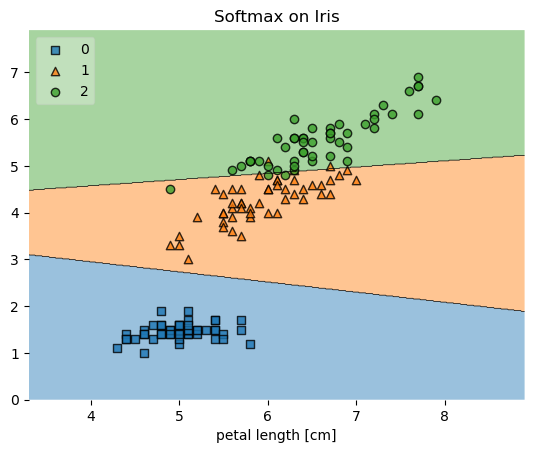

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

# Logistic Regression

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assume X and y are your features and target variable
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv').dropna()

X = df[['Age','Fare']]
y = df['Survived']
# Initialize a logistic regression model

X

y


1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

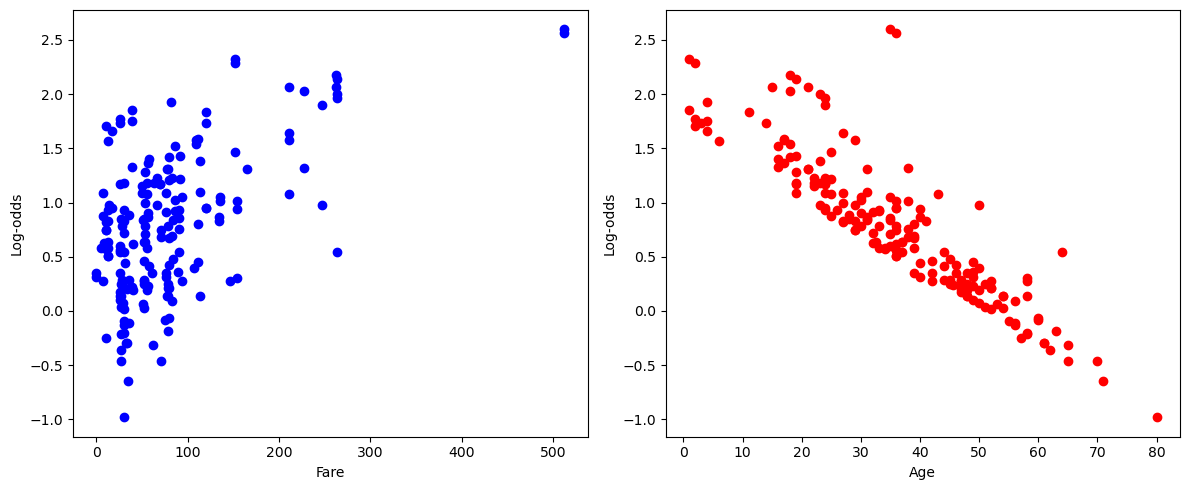

In [19]:
model = LogisticRegression()

# Fit the model on the data
model.fit(X, y)

# Get predictions (probabilities)
predicted = model.predict_proba(X)[:,1]

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fare vs log-odds
ax[0].scatter(x=X['Fare'].values, y=log_odds, color='blue')
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Log-odds")

# Plot Age vs log-odds
ax[1].scatter(x=X['Age'].values, y=log_odds, color='red')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Log-odds")

# Show plots
plt.tight_layout()
plt.show()


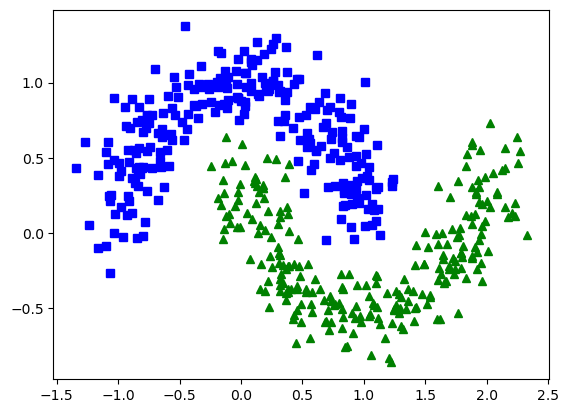

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")


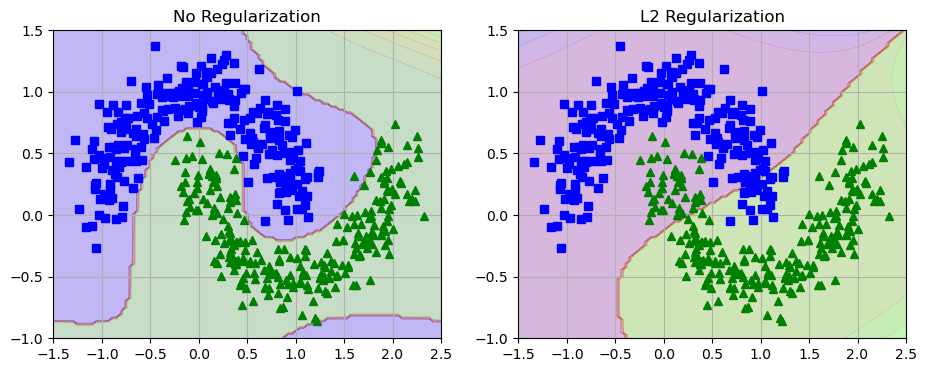

In [21]:
# Create a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  
    # C=0.1 implies a stronger regularization
])

model_no_reg.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("L2 Regularization")

plt.show()


In [22]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
# Make sure to provide the correct path to your file
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  

# Drop rows with missing values and select only numerical features
df = df.dropna().select_dtypes(include=['number'])

df.drop(columns=['PassengerId'],inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [23]:
# Define features and target variables
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Initialize a logistic regression model with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42,
                           C=0.5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients
coefficients = model.coef_
print("Model coefficients:", coefficients)

# Extract original column names from DataFrame
column_names = df.drop('Survived', axis=1).columns

# Features with coefficients that are 0 were effectively eliminated by the L1 regularization
eliminated_features = column_names[coefficients[0] == 0]
print("Eliminated features:", eliminated_features)


Model coefficients: [[-0.10313963 -0.38245202  0.         -0.10773421  0.26175659]]
Eliminated features: Index(['SibSp'], dtype='object')


# Polynomial Logistic Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('ushape.csv')

In [26]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [27]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

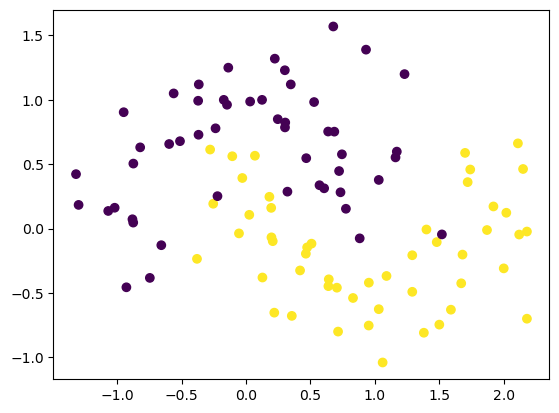

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [30]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

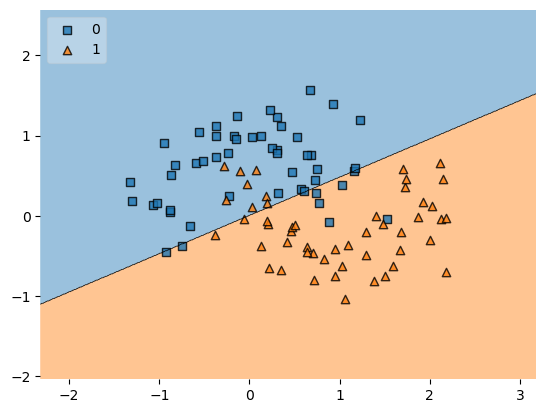

In [31]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [32]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [34]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [35]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

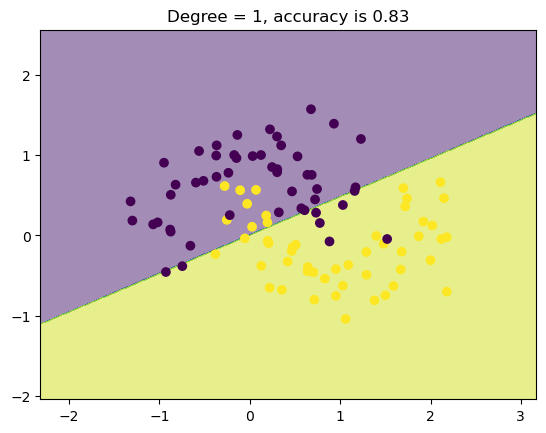

In [36]:
plot_decision_boundary(X,y)

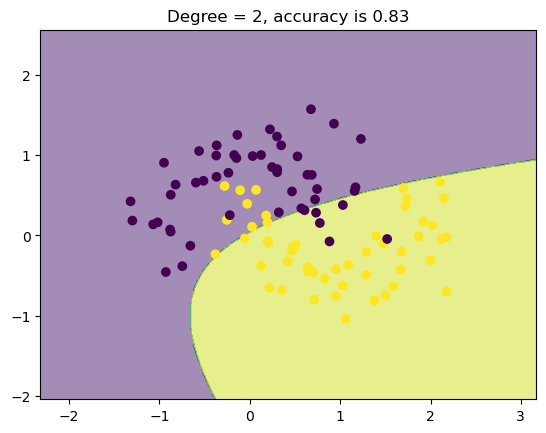

In [37]:
plot_decision_boundary(X,y,degree=2)

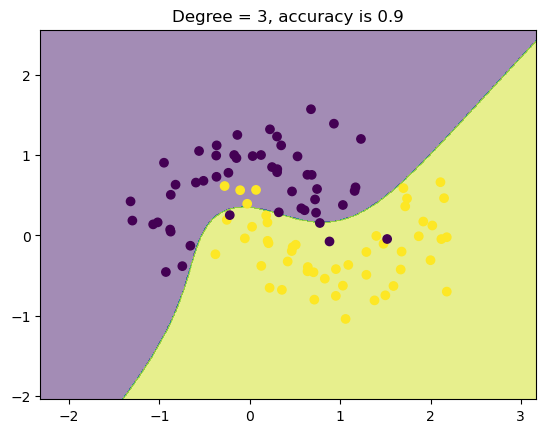

In [38]:
plot_decision_boundary(X,y,degree=3)

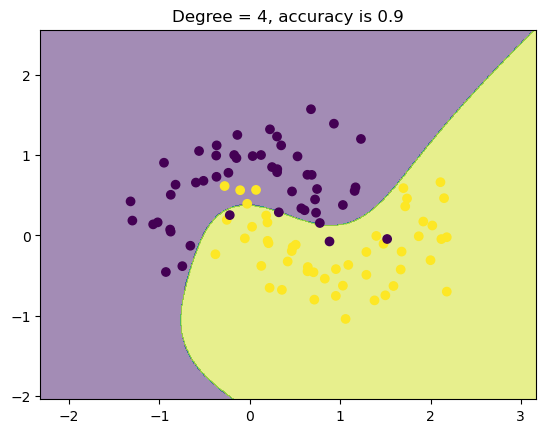

In [39]:
plot_decision_boundary(X,y,degree=4)

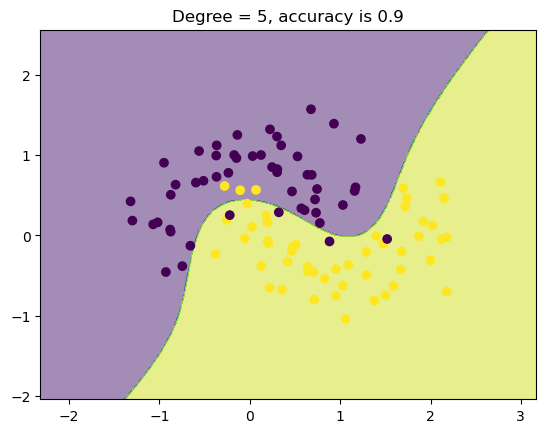

In [40]:
plot_decision_boundary(X,y,degree=5)

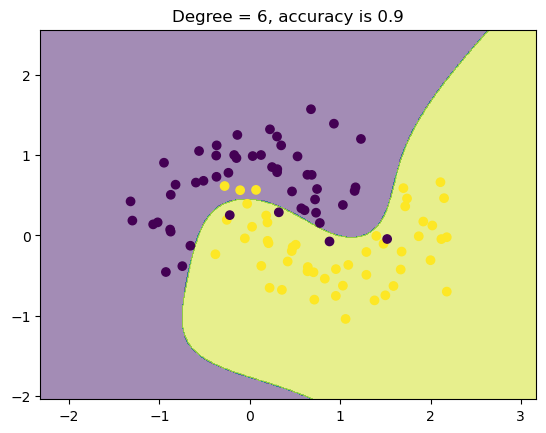

In [41]:
plot_decision_boundary(X,y,degree=6)

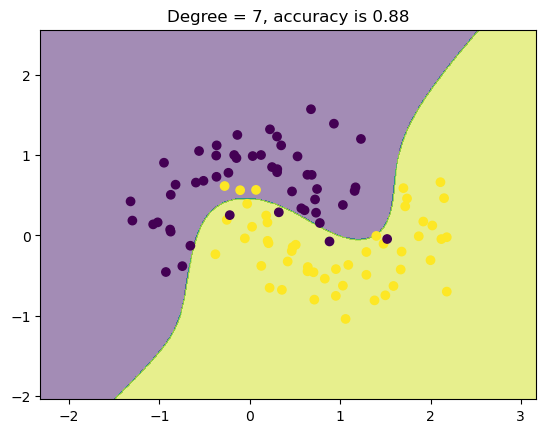

In [42]:
plot_decision_boundary(X,y,degree=7)

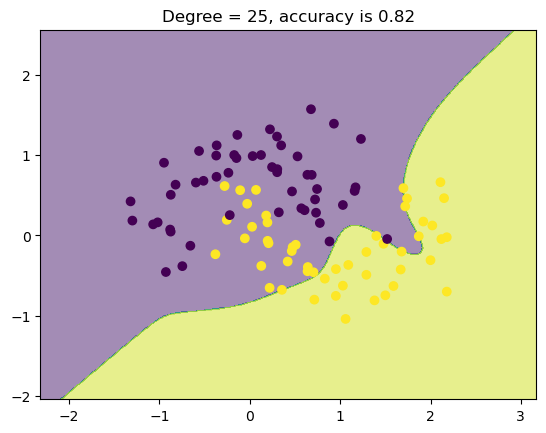

In [43]:
plot_decision_boundary(X,y,degree=25)